Weather.txt

Utworzenie pliku zawierającego dane tylko z 2010 roku odnośnie temperatur oraz opadów.

In [5]:
import  pandas as pd
with open("../Original_data/weather.txt", encoding='utf-8') as f:
    text = f.readlines()
    j=0
    table = 'year;month;day;tmax;tmin;prcp'+'\n'
    for i in range(1,1713,3):
        if text[i-j][11:15] == '2010':
            if text[i-j][17:21] == 'TMIN':
                for d in range(1,32):
                    new_line = ''
                    tmax = text[i-1-j][13+8*d:20+8*d]
                    if tmax == '-9999  ':
                        tmax = 'NaN'

                    tmin = text[i-j][13+8*d:20+8*d]
                    if tmin == '-9999  ':
                        tmin = 'NaN'

                    prcp = text[i+1-j][13+8*d:20+8*d]
                    if prcp == '-9999  ':
                        prcp = 'NaN'
                    if tmin != 'NaN' or tmax != 'NaN' or prcp != 'NaN':
                        if d < 10:
                            new_line += text[i-j][11:15]+';'+text[i-j][15:17]+';0'+str(d)+';'+tmax+';'+tmin+';'+prcp
                            new_line += '\n'
                        else:
                            new_line += text[i-j][11:15]+';'+text[i-j][15:17]+';'+str(d)+';'+tmax+';'+tmin+';'+prcp
                            new_line += '\n'
                        table += new_line
            if text[i-j][17:21] != 'TMIN':
                new_line = ''
                for d in range(1,32):
                    prcp = text[i-1-j][13+8*d:20+8*d]
                    if prcp == '-9999  ':
                        prcp = 'NaN'
                    if prcp != 'NaN':
                        if d < 10:
                            new_line += text[i-1-j][11:15]+';'+text[i-1-j][15:17]+';0'+str(d)+';'+'NaN'+';'+'NaN'+';'+prcp
                            new_line += '\n'
                        else:
                            new_line += text[i-1-j][11:15]+';'+text[i-1-j][15:17]+';'+str(d)+';'+'NaN'+';'+'NaN'+';'+prcp
                            new_line += '\n'
                table += new_line
                j += 2
w = open('weather2010.txt','wt')
w.write(table)
w.close()
weather_final = pd.read_csv("weather2010.txt", delimiter=';')
weather_final.to_csv('../Documents/weather_final.csv',sep = ';')
f.close()

Wyznaczenie maksymalnej i minimalnej temperatury oraz sumy opadów w poszczególnych miesiącach.

In [8]:
new_table = weather_final[['month','tmax','tmin','prcp']]
data_to_list = new_table.values.tolist()
#print(data_to_list)

max_temp = [None] *12
min_temp = [None] *12
sum_prcb_per_month = [None] *12
mesure_per_month = [0] * 12
for mesure in data_to_list:
    if max_temp[int(mesure[0]-1)] is None or mesure[1] > max_temp[int(mesure[0]-1)]:
        if not pd.isna(mesure[1]) :
            max_temp[int(mesure[0]-1)] = mesure[1]
    if min_temp[int(mesure[0]-1)] is None or mesure[2] < min_temp[int(mesure[0]-1)]:
        if not pd.isna(mesure[2]):
            min_temp[int(mesure[0]-1)] = mesure[2]
    if not pd.isna(mesure[3]):
        if sum_prcb_per_month[int(mesure[0]-1)] is None:
            sum_prcb_per_month[int(mesure[0]-1)] = 0
        sum_prcb_per_month[int(mesure[0]-1)] += mesure[3]
    mesure_per_month[int(mesure[0]-1)] += 1

Wyrysowanie wykresu z otrzymanych danych oraz zapisanie go do osobnego pliku.

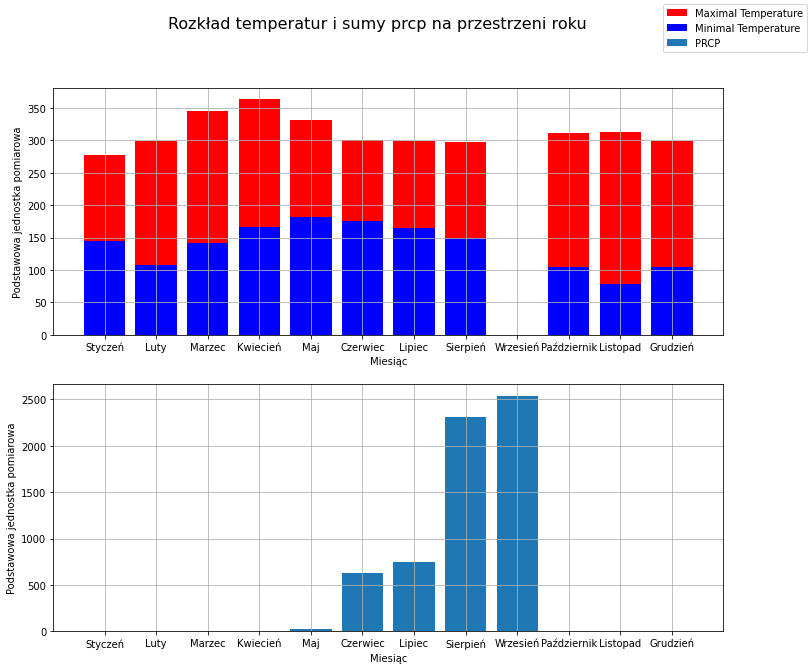

In [26]:
from matplotlib import pyplot as plt
import numpy as np

def plot_wykres(tmin,tmax,prcp,mes_p_m, bars):

    for i in range(len(mes_p_m)):
        if tmin[i] is None:
            tmin[i] = 0
        if tmax[i] is None:
            tmax[i] = 0


    y_posmax = np.arange(len(tmax))
    y_postmin = np.arange(len(tmin))
    y_posprcp = np.arange(len(prcp))
    fig, axs = plt.subplots(2, figsize=(12,10))
    axs[0].bar(y_posmax,tmax, color = 'red', label = 'Maximal Temperature')
    axs[0].set(xlabel='Miesiąc', ylabel='Podstawowa jednostka pomiarowa', xticks=y_posmax, xticklabels=bars)
    axs[0].bar(y_postmin,tmin, color = 'blue', label = 'Minimal Temperature')
    axs[0].grid()
    axs[1].set(xlabel='Miesiąc', ylabel='Podstawowa jednostka pomiarowa', xticks=y_posmax, xticklabels=bars)
    axs[1].bar(y_posprcp,prcp, label = 'PRCP')
    axs[1].grid()
    fig.legend()
    fig.suptitle('Rozkład temperatur i sumy prcp na przestrzeni roku', fontsize=16)
    fig.set_facecolor('white')
    fig.savefig('../Analysis/Wykres_analiza')

bars = ['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec','Sierpień','Wrzesień','Październik','Listopad','Grudzień']
plot_wykres(min_temp,max_temp,sum_prcb_per_month,mesure_per_month,bars)